In [31]:
import pandas as pd
from sklearn import preprocessing
import psycopg2
import warnings
warnings.simplefilter("ignore")

In [32]:
host = "np-ado-asg2-jairzhou.postgres.database.azure.com"
port = 5432
dbname = "postgres"
username = "admin1@np-ado-asg2-jairzhou"
pwd = "jair_zhou1"

table = "telecom6"

In [33]:
with psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd)) as conn:
    sql = "select * from {};".format(table)
    df = pd.read_sql_query(sql, conn)

In [5]:
df.head()

,churn,gender,tenure,partner,contract,customerid,dependents,streamingtv,techsupport,onlinebackup,...,monthlycharges,onlinesecurity,internetservice,streamingmovies,deviceprotection,paperlessbilling,_airbyte_ab_id,_airbyte_emitted_at,_airbyte_normalized_at,_airbyte_telecom6_hashid
0,No,Female,1,Yes,Month-to-month,7590-VHVEG,No,No,No,Yes,...,29.85,No,DSL,No,No,Yes,80b53cc9-c96b-4703-9374-64b46e0e143b,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,b9c97b3b2d97b4341b64d50d75e9f497
1,No,Male,34,No,One year,5575-GNVDE,No,No,No,No,...,56.95,Yes,DSL,No,Yes,No,32ab3ca5-c438-439e-b935-8b199e8d40b8,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,bc86c2786cb10b48595bdfff0d10c6d7
2,Yes,Male,2,No,Month-to-month,3668-QPYBK,No,No,No,Yes,...,53.85,Yes,DSL,No,No,Yes,1faf97fc-0019-458b-8f27-959b4125a53e,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,4c919e365a783b1324714e9eb82c9718
3,No,Male,45,No,One year,7795-CFOCW,No,No,Yes,No,...,42.30,Yes,DSL,No,Yes,No,7cb13253-7a71-4a33-9706-d7049f8d9929,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,5adee2f60555b2a9f61663e5198c53ff
4,Yes,Female,2,No,Month-to-month,9237-HQITU,No,No,No,No,...,70.70,No,Fiber optic,No,No,Yes,60aab01a-d653-4a60-b652-223174887d55,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.674071+00:00,a509b45972b86dcce8966bc458b13489


In [6]:
# drop irrelevant data
df.drop(list(df.filter(regex = '_airbyte_')), axis = 1, inplace = True)
df.head()

,churn,gender,tenure,partner,contract,customerid,dependents,streamingtv,techsupport,onlinebackup,...,totalcharges,multiplelines,paymentmethod,seniorcitizen,monthlycharges,onlinesecurity,internetservice,streamingmovies,deviceprotection,paperlessbilling
0,No,Female,1,Yes,Month-to-month,7590-VHVEG,No,No,No,Yes,...,29.85,No phone service,Electronic check,0,29.85,No,DSL,No,No,Yes
1,No,Male,34,No,One year,5575-GNVDE,No,No,No,No,...,1889.50,No,Mailed check,0,56.95,Yes,DSL,No,Yes,No
2,Yes,Male,2,No,Month-to-month,3668-QPYBK,No,No,No,Yes,...,108.15,No,Mailed check,0,53.85,Yes,DSL,No,No,Yes
3,No,Male,45,No,One year,7795-CFOCW,No,No,Yes,No,...,1840.75,No phone service,Bank transfer (automatic),0,42.30,Yes,DSL,No,Yes,No
4,Yes,Female,2,No,Month-to-month,9237-HQITU,No,No,No,No,...,151.65,No,Electronic check,0,70.70,No,Fiber optic,No,No,Yes


In [7]:
df.isnull().sum()

churn                0
gender               0
tenure               0
partner              0
contract             0
customerid           0
dependents           0
streamingtv          0
techsupport          0
onlinebackup         0
phoneservice         0
totalcharges        11
multiplelines        0
paymentmethod        0
seniorcitizen        0
monthlycharges       0
onlinesecurity       0
internetservice      0
streamingmovies      0
deviceprotection     0
paperlessbilling     0
dtype: int64

In [8]:
# service are contains null values, fill that with the mode
df['totalcharges']= df['totalcharges'].fillna(0)

In [9]:
df.isnull().sum()

churn               0
gender              0
tenure              0
partner             0
contract            0
customerid          0
dependents          0
streamingtv         0
techsupport         0
onlinebackup        0
phoneservice        0
totalcharges        0
multiplelines       0
paymentmethod       0
seniorcitizen       0
monthlycharges      0
onlinesecurity      0
internetservice     0
streamingmovies     0
deviceprotection    0
paperlessbilling    0
dtype: int64

In [10]:
df_cat = df.select_dtypes(['object']).copy()
df_cat = df_cat.drop(columns = ['churn','customerid'])
df_cat.columns  #### find the cateogry columns that we want to encode

Index(['gender', 'partner', 'contract', 'dependents', 'streamingtv',
       'techsupport', 'onlinebackup', 'phoneservice', 'multiplelines',
       'paymentmethod', 'onlinesecurity', 'internetservice', 'streamingmovies',
       'deviceprotection', 'paperlessbilling'],
      dtype='object')

In [11]:
# drop unecessary columns which are not significant to churn
df = df.drop(columns = ['customerid'])

In [12]:
# enocde churn columns. No = 0, Yes =1  
mappings={'Yes':1,'No':0}
df['churn']=df['churn'].map(mappings)

In [13]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
columns = ['gender', 'partner', 'contract', 'dependents', 'streamingtv',
       'techsupport', 'onlinebackup', 'phoneservice', 'multiplelines',
       'paymentmethod', 'onlinesecurity', 'internetservice', 'streamingmovies',
       'deviceprotection', 'paperlessbilling']
# Encode labels in columns list
for i in columns:
    df[i]= label_encoder.fit_transform(df[i])

In [14]:
df.head()

,churn,gender,tenure,partner,contract,dependents,streamingtv,techsupport,onlinebackup,phoneservice,totalcharges,multiplelines,paymentmethod,seniorcitizen,monthlycharges,onlinesecurity,internetservice,streamingmovies,deviceprotection,paperlessbilling
0,0,0,1,1,0,0,0,0,2,0,29.85,1,2,0,29.85,0,0,0,0,1
1,0,1,34,0,1,0,0,0,0,1,1889.50,0,3,0,56.95,2,0,0,2,0
2,1,1,2,0,0,0,0,0,2,1,108.15,0,3,0,53.85,2,0,0,0,1
3,0,1,45,0,1,0,0,2,0,0,1840.75,1,0,0,42.30,2,0,0,2,0
4,1,0,2,0,0,0,0,0,0,1,151.65,0,2,0,70.70,0,1,0,0,1


In [15]:
# modelling

In [16]:
from sklearn.model_selection import train_test_split
xtra,xtes,ytra,ytes = train_test_split(df.drop("churn", axis = 1),df["churn"], test_size = 0.3,
                                      random_state = 404)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state = 402)

param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [43]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtra,ytra)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=402),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]})

In [44]:
CV_rfc.best_params_ #find best parameters

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 20}

In [18]:
# apply paramaters
rfm = RandomForestClassifier(criterion = "gini", max_depth = 7,
                             max_features = "auto", n_estimators = 20,
                             random_state = 402)

rfm.fit(xtra,ytra)

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=402)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_preds = rfm.predict(xtra)
y_test_preds = rfm.predict(xtes)

In [47]:
print(classification_report(ytes, y_test_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1570
           1       0.67      0.53      0.59       543

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



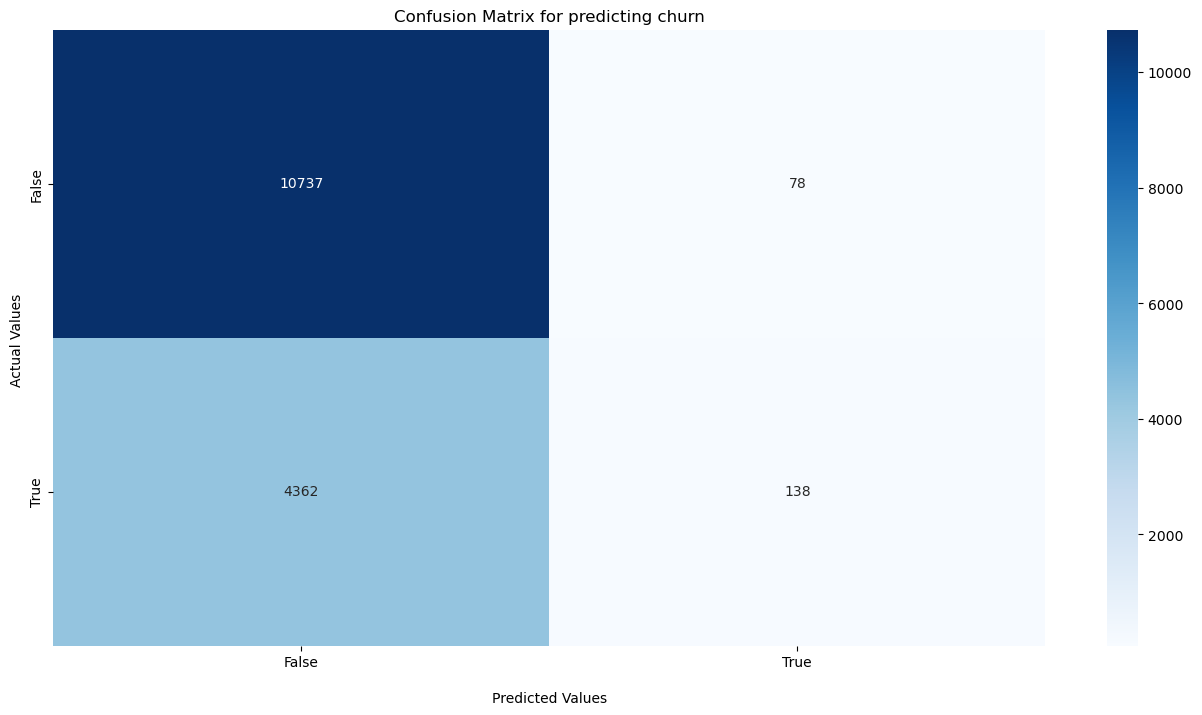

In [22]:
cf_matrix = confusion_matrix(ytes, y_test_preds)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,8))

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

ax.set_title('Confusion Matrix for predicting churn');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
# Obtain the feature importances
importances = rfm.feature_importances_

# Print the importances
feature_importance = pd.DataFrame(xtra.columns, columns=["feature"])
feature_importance["importance"] = importances
feature_importance.sort_values("importance", ascending=False)

,feature,importance
3,contract,0.208697
1,tenure,0.183587
9,totalcharges,0.112100
13,monthlycharges,0.103533
14,onlinesecurity,0.085062
6,techsupport,0.066028
15,internetservice,0.057142
7,onlinebackup,0.036110
11,paymentmethod,0.034486
18,paperlessbilling,0.026058


the ‘contact’ feature has the highest importance with a value of 0.208697, followed by the ‘tenure’ feature with a value of 0.183587 and so on. 
